# PCA 실습

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()
iris.data.shape # iris는 4차원 데이터

(150, 4)

In [5]:
X = iris.data

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape # 4차원 -> 2차원으로 줄어들음

(150, 2)

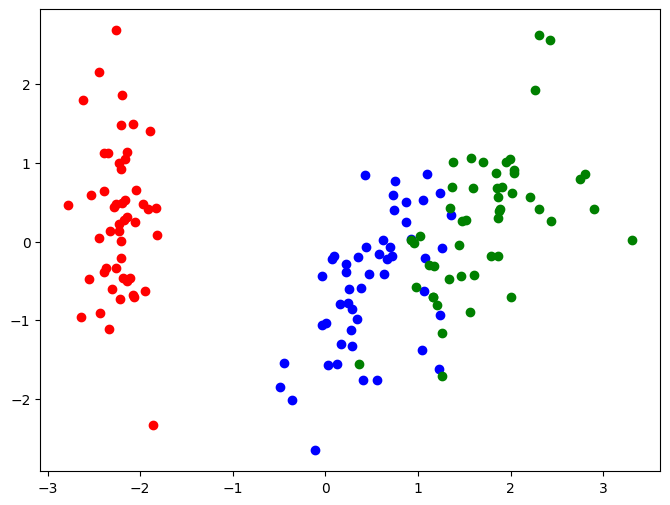

In [11]:
plt.figure(figsize=(8,6))
color = ['red', 'blue', 'green']

for i in range(3):
    mask = iris.target == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], c=color[i])    

plt.show()

---
# K-Means 실습

In [39]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [40]:
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

In [41]:
X.shape

(300, 2)

In [42]:
y_true.shape

(300,)

In [50]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

In [51]:
kmeans.fit_predict(X_pca)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

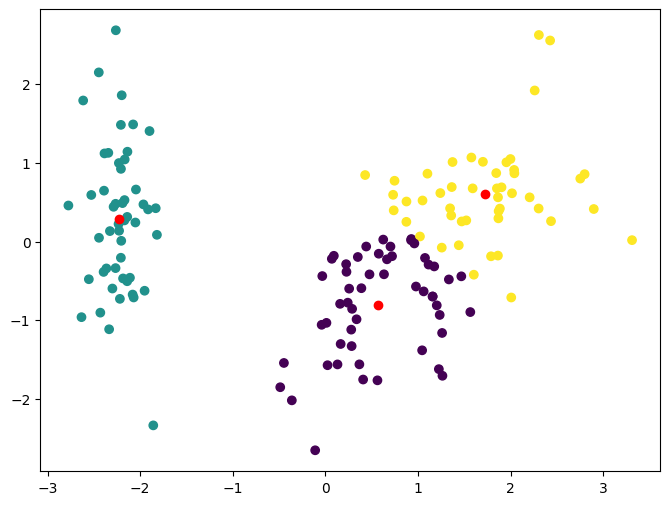

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x=X_pca[:,0], y=X_pca[:, 1], c=kmeans.fit_predict(X_pca))
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red')
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
inertias = []
silhouettes = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels))

inertias, silhouettes

([5763.464789461436,
  566.8595511244131,
  497.03398814952106,
  428.21421299328415,
  375.0659248776244,
  308.1983661041825,
  272.4057314987481,
  234.28072349591133,
  219.04053338999887],
 [0.7049437310743717,
  0.8480303059596955,
  0.6764211610337508,
  0.49631564306271625,
  0.5170399982662364,
  0.3580305869834248,
  0.3625632360122801,
  0.37134027555333016,
  0.36388246568702687])

---
# Hierarchical Clustering 실습

In [53]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [66]:
X, y = make_blobs(n_samples=40, centers=3, n_features=2, random_state=42) #center : 군집

In [67]:
X.shape # n_sample 40 / n_feature 2 가 만들어짐

(40, 2)

In [68]:
Z = linkage(X, method='ward')

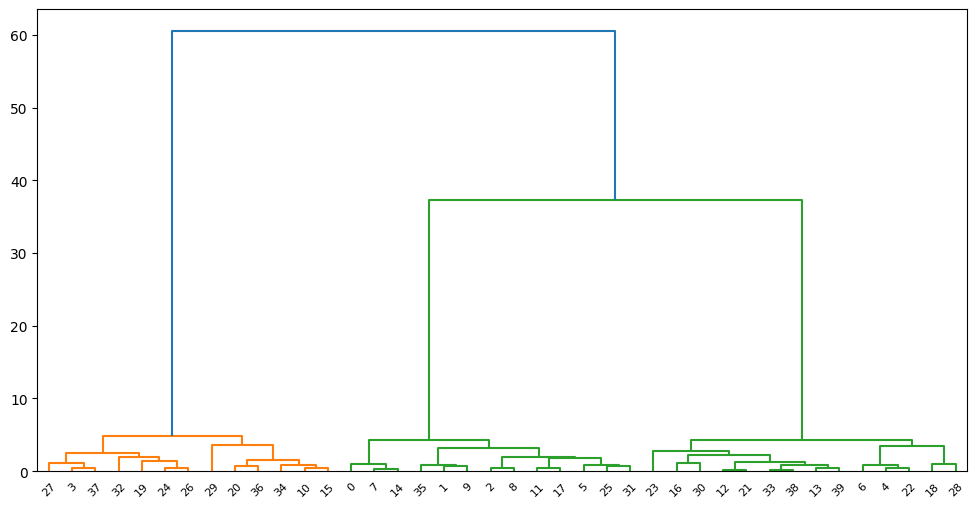

In [69]:
plt.figure(figsize=(12,6))
dendrogram(Z)
plt.show()

In [70]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clustering.fit_predict(X)

In [71]:
y

array([1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0,
       0, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 0])

In [72]:
labels

array([2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1,
       1, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1])

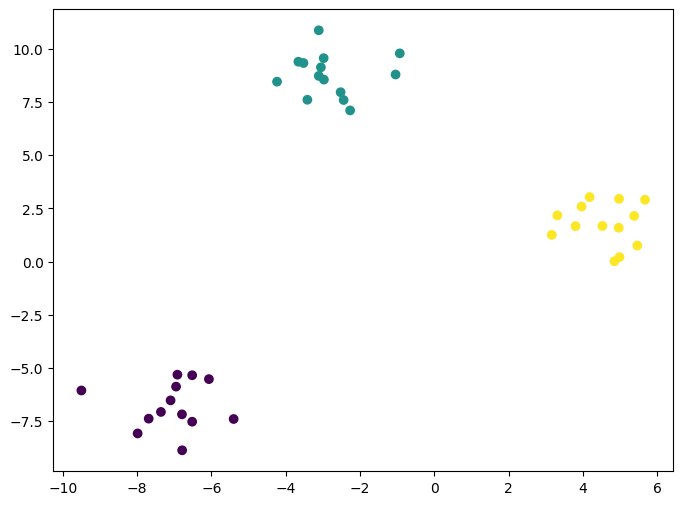

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

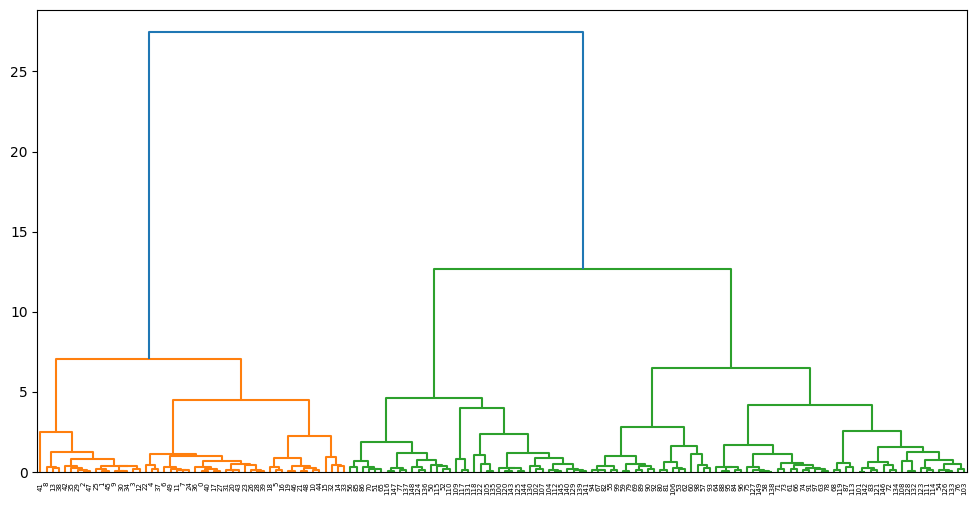

In [76]:
# iris로 댄드로그램 그리기
Z = linkage(X_pca, method='ward')
plt.figure(figsize=(12,6))
dendrogram(Z)
plt.show()

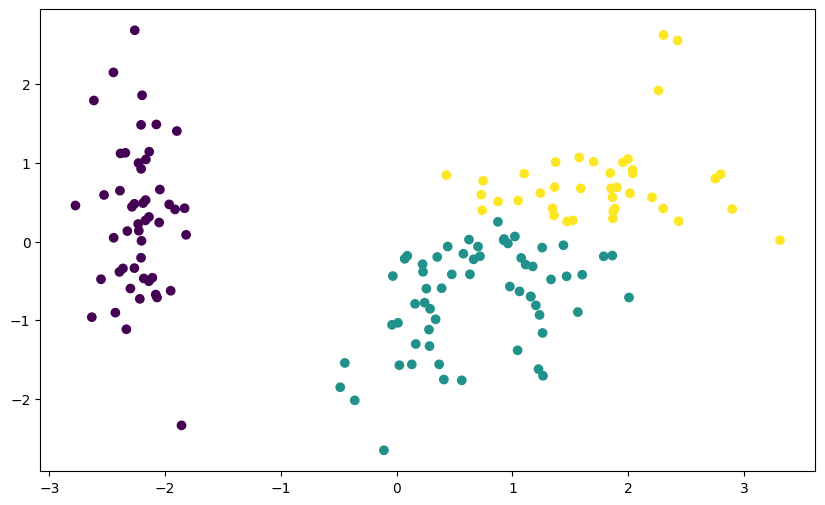

In [79]:
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = clustering.fit_predict(X_pca)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.show()